In [ ]:
import os
os.chdir('/content/drive/MyDrive/365 frontier ai/day 3/')

In [ ]:
words = open('names.txt', 'r').read().splitlines()

words[:10]

In [ ]:
min(len(w) for w in words)

2

In [ ]:
max(len(w) for w in words)

15

In [ ]:
b = {}
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1


In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [ ]:
import torch


In [ ]:
N = torch.zeros((27, 27), dtype = torch.int32)


In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [ ]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [ ]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [ ]:
itos = {i:s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

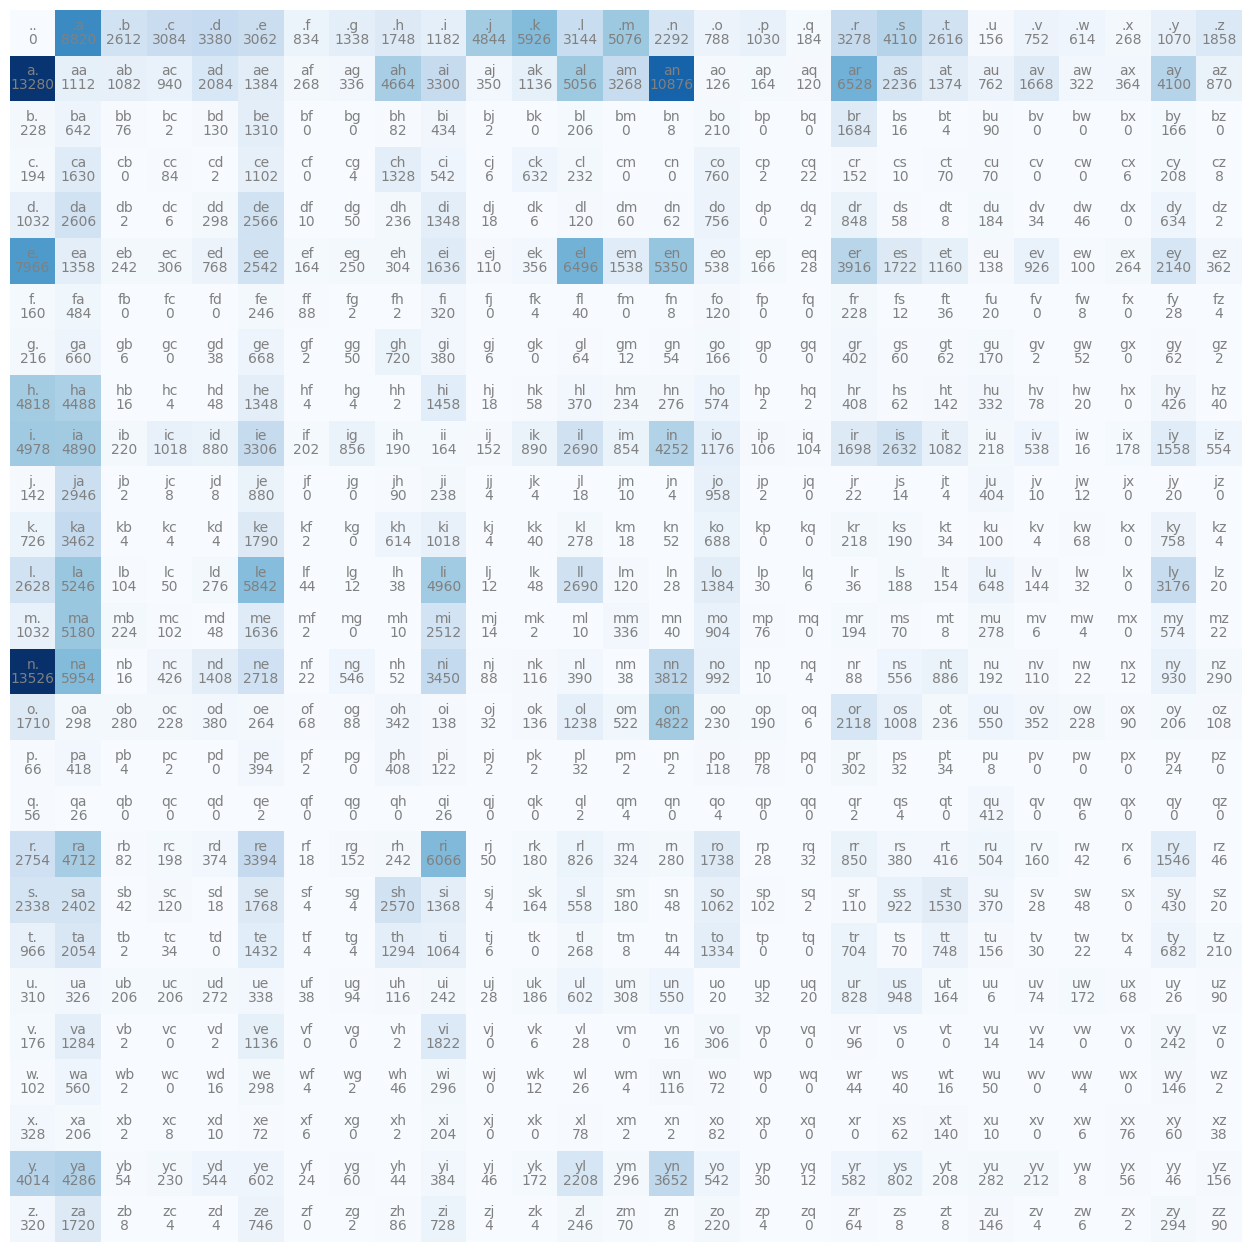

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize =(16,16))
plt.imshow(N, cmap = 'Blues')
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
    plt.text(j,i, N[i,j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [ ]:
N[0]

tensor([   0, 8820, 2612, 3084, 3380, 3062,  834, 1338, 1748, 1182, 4844, 5926,
        3144, 5076, 2292,  788, 1030,  184, 3278, 4110, 2616,  156,  752,  614,
         268, 1070, 1858], dtype=torch.int32)

In [ ]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]


'c'

In [ ]:
torch.multinomial(p,num_samples=20,replacement=True,generator=g)

tensor([ 9, 18,  2,  5,  3,  1, 13, 11, 11, 22, 11, 15, 26,  2, 18, 13, 10,  1,
        15,  2])

In [ ]:
p.shape

torch.Size([27])

In [ ]:
P.shape

torch.Size([27, 27])

In [ ]:
P.sum(1).shape

torch.Size([27])

In [ ]:
P = (N+1).float()
P = P/P.sum(1, keepdim=True)

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
  out = []
  ix = 0
  while True:
    p = P[ix]
    #p = N[ix].float()
    #p = p / p.sum()
    ix = torch.multinomial(p, num_samples = 1, replacement= True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))


cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [ ]:
print(P.sum(1))

# Check the sum of the first row
print(f"First row sum: {P[0].sum().item()}")

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
First row sum: 1.0


In [ ]:
log_likelihood = 0.0
n=0
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f'{ch1}{ch2}: {logprob:.4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

Streaming output truncated to the last 5000 lines.
en: -2.0332
nr: -6.0214
ri: -1.4329
iq: -5.8213
qu: -0.3239
ue: -2.9218
e.: -1.6352
.l: -3.0145
lu: -3.7625
ui: -3.2548
is: -2.5994
sm: -4.4967
mi: -1.6671
ig: -3.7218
gu: -3.1222
ue: -2.9218
el: -1.8391
l.: -2.3636
.l: -3.0145
lu: -3.7625
uk: -3.5167
km: -6.2765
ma: -0.9436
an: -1.8299
n.: -0.9976
.l: -3.0145
lu: -3.7625
un: -2.4361
na: -1.8180
a.: -1.6302
.l: -3.0145
lu: -3.7625
uv: -4.4303
v.: -3.3751
.l: -3.0145
ly: -2.1742
yn: -1.6789
nt: -3.7222
to: -2.1240
on: -1.1926
n.: -0.9976
.l: -3.0145
ly: -2.1742
yo: -3.5851
on: -1.1926
ns: -4.1874
s.: -1.9377
.l: -3.0145
ly: -2.1742
yt: -4.5399
te: -2.0532
e.: -1.6352
.m: -2.5356
ma: -0.9436
aa: -4.1095
ad: -3.4817
dh: -3.8393
ha: -1.2235
av: -3.7043
v.: -3.3751
.m: -2.5356
ma: -0.9436
ac: -4.2773
cc: -4.4239
ca: -1.4696
ab: -4.1368
be: -1.4001
ee: -2.7771
e.: -1.6352
.m: -2.5356
ma: -0.9436
ac: -4.2773
ci: -2.5695
ie: -2.3715
ej: -5.9087
j.: -3.7074
.m: -2.5356
ma: -0.9436
ac: -4.2773
c